## Анализ данных по Covid 19

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### загрузка данных

In [5]:
df_0 = pd.read_csv("data/covid_19_data.csv")
df_0.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [8]:
# смотрим последнюю дату
df_0['ObservationDate'].iloc[-1]

'05/29/2021'

In [7]:
df_0.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [10]:
# конвертация временных данных
lastdate = '05/29/2021'
pd.to_datetime(lastdate).date()

datetime.date(2021, 5, 29)

In [13]:
df_1 = df_0.copy ()

df_1['ObservationDate']= pd.to_datetime(df_1['ObservationDate'])
df_1['ObservationDate'][0]

Timestamp('2020-01-22 00:00:00')

In [19]:
# по-элементно меняем тип данных дат
def get_date(ts):
    return ts.date()
df_1['ObservationDate'] = df_1['ObservationDate'].apply(get_date)
df_1['ObservationDate'][0]

datetime.date(2020, 1, 22)

In [20]:
# удаление ненужных столбцов
df_2 = df_1.drop(['SNo','Last Update'], axis=1)
df_2.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [24]:
# проверка на дубликаты
df_2.duplicated().sum()

0

In [23]:
# удаление дубликата
df_2 = df_2.drop_duplicates()

In [28]:
# изучаем названия стран
df_2['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', 'Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia',
       'Portugal', 'Andorra', '

In [27]:
# исправление списка
df_2['Country/Region'] = df_2['Country/Region'].str.strip(" ,()'")

In [29]:
# изучаем страну others - фильтрация данных
df_2.loc[df_2['Country/Region'] == "Others", :]

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
965,2020-02-07,Cruise Ship,Others,61.0,0.0,0.0
1039,2020-02-08,Cruise Ship,Others,61.0,0.0,0.0
1113,2020-02-09,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1181,2020-02-10,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1255,2020-02-11,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1328,2020-02-12,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1403,2020-02-13,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1479,2020-02-14,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1554,2020-02-15,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1628,2020-02-16,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [31]:
# группировка данных по странам и датам (по иерархии индексов)
cd_data = df_2.groupby(['Country/Region', 'ObservationDate'])[['Confirmed', 'Deaths', 'Recovered']].sum()
cd_data.head(10)

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
               2020-02-28             1.0     0.0        0.0
               2020-02-29             1.0     0.0        0.0
               2020-03-01             1.0     0.0        0.0
               2020-03-02             1.0     0.0        0.0
               2020-03-03             2.0     0.0        0.0
               2020-03-04             4.0     0.0        0.0

In [33]:
# данные макс (количество всех заболевших, погибших и выздоровивших) по странам
max_data = cd_data.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered']].max()
max_data.head(30)

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,70111.0,2899.0,57281.0
Albania,132297.0,2449.0,129215.0
Algeria,128456.0,3460.0,89419.0
Andorra,13693.0,127.0,13416.0
Angola,34180.0,757.0,27646.0
Antigua and Barbuda,1259.0,42.0,1206.0
Argentina,3732263.0,77108.0,3288467.0
Armenia,222555.0,4428.0,212752.0
Aruba,4.0,0.0,0.0


In [38]:
# сортировка данных по определенному столбцу
max_data.sort_values("Deaths", ascending=False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,33251939.0,594306.0,6399531.0
Brazil,16471600.0,461057.0,14496224.0
India,27894800.0,325972.0,25454320.0
Mexico,2411503.0,223455.0,1924865.0
UK,4496823.0,128037.0,15481.0
Italy,4213055.0,126002.0,3845087.0
Russia,4995613.0,118781.0,4616422.0
France,5978650.0,109518.0,390878.0
Germany,3684672.0,88413.0,3479700.0


In [39]:
# группировка данных по датам по всему миру
w_data = df_2.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum()
w_data.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,653.0,17.0,32.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


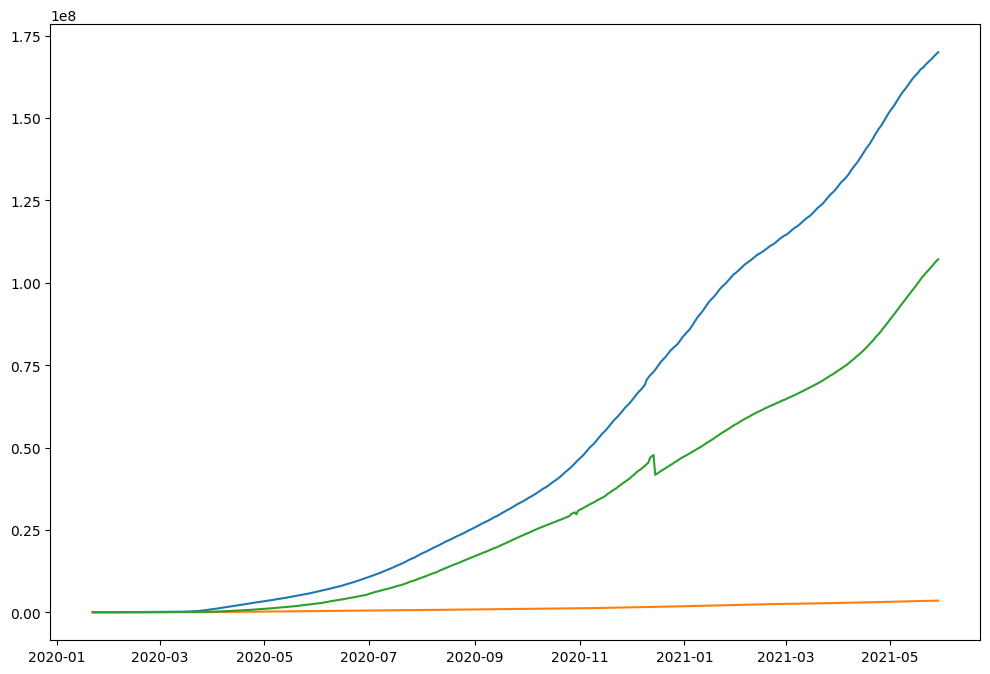

In [40]:
# визуализация динамики пандемии по всему миру
plt.figure(figsize=(12,8))
plt.plot(w_data.index, w_data['Confirmed'])
plt.plot(w_data.index, w_data['Deaths'])
plt.plot(w_data.index, w_data['Recovered'])
plt.show()

In [14]:
df_0.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')